# EMBEDD-ER : EMBEDDing Educational Resources using Linked Open Data
This notebook is used for testing EMBEDD-ER's embeddings similarity with Heatmaps.

In [1]:
# Reading the texts
import pandas as pd
version = "v01"
df_chapters = pd.read_csv('data/OYC/chapters.csv', sep = '|')

In [3]:
df_embeddings = pd.read_csv('output/embeddings/embeddings.csv', sep = '|', index_col=0)
df_embeddings.head()

EMBEDD-ER  \
0  [-0.2611739  -0.20030674 -0.52490826  0.289911...   
1  [-0.28527858 -0.16301882 -0.37927239  0.316366...   
2  [-3.15219876e-01 -1.41333521e-01 -4.36518237e-...   
3  [-0.31853273 -0.23486411 -0.55784251  0.306479...   
4  [-3.45781975e-01 -1.57577504e-01 -3.42296262e-...   

                                                BERT  \
0  [ 5.24575599e-02  4.75991100e-01  5.52127510e-...   
1  [-1.22001301e-02  2.44756475e-01  1.15076415e-...   
2  [ 9.50357988e-02  2.25325644e-01  1.71594620e-...   
3  [ 3.15149575e-02  4.43076760e-01  1.21050894e-...   
4  [-3.27652320e-02  1.49507046e-01  1.28363326e-...   

                                             Doc2Vec  \
0  [ 3.92783782e-04 -9.83562059e-05 -5.86961214e-...   
1  [-1.62871875e-04  2.35371685e-04 -3.93501279e-...   
2  [ 1.54976849e-04  9.49939058e-05  3.17110418e-...   
3  [ 3.15306592e-04 -5.52248501e-04  6.87067222e-...   
4  [-7.27268925e-04 -6.28604030e-05  7.20357988e-...   

                                              TF-IDF  
0  [0.059848804, -0.027463447, 0.014908703, -0.16...  
1  [0.06559065, -0.022513798, 0.06306133, -0.2781...  
2  [0.06339698, -0.046637986, 0.012293681, -0.247...  
3  [0.07305675, -0.04276956, 0.019390203, -0.2750...  
4  [0.033779554, -0.12393971, -0.051934402, -0.03...

In [9]:
resources_bis = [1, 2, 3, 455, 456, 457, 845, 846, 847, 1422, 1423, 1424]

#1 American-African studies :   1, 2, 3, 4 
#2 Biomedical Engineering   :   455, 456, 457, 458 
#3 Economics                :   845, 846, 847, 848 
#4 Geology and geophysics   :   1422, 1423, 1424, 1425

nb_topics = 4
courses_per_topic = 3
topics = []
j = 1
for i in range(len(resources_bis)):
    if i/nb_topics < j:
        topics.append(j)
    else : 
        j += 1
        topics.append(j)

In [10]:
import numpy as np

resources = df_chapters['Cid'].values

embedder_embeddings = {}
bert_embeddings = {}
doc2vec_embeddings = {}
tfidf_embeddings = {}

i = 0

for r in resources:
    embedder_embeddings[r] = list(filter(None, df_embeddings['EMBEDD-ER'][r].strip("[]\n").replace("'","").split(" ")))
    embedder_embeddings[r] = [float(f) for f in embedder_embeddings[r]]

    bert_embeddings[r] = list(filter(None, df_embeddings['BERT'][r].strip("[]\n").replace("'","").split(" ")))
    bert_embeddings[r] = [float(f) for f in bert_embeddings[r]] 

    doc2vec_embeddings[r] = list(filter(None, df_embeddings['Doc2Vec'][r].strip("[]\n").replace("'","").split(" ")))
    doc2vec_embeddings[r] = [float(f) for f in doc2vec_embeddings[r]] 


    tfidf_embeddings[r] = list(filter(None, df_embeddings['TF-IDF'][r].strip("[]\n").replace("'","").split(",")))
    tfidf_embeddings[r] = [float(f) for f in tfidf_embeddings[r]]



print(len(embedder_embeddings))
print(len(bert_embeddings))
print(len(doc2vec_embeddings))
print(len(tfidf_embeddings))

2550
2550
2550
2550


In [13]:
from similarity.metrics import distance_matrix

similarity_l2norm_embedder = distance_matrix([list(embedder_embeddings[k]) for k in resources_bis], method = 'norm', n = 2)
similarity_cosine_embedder = distance_matrix([list(embedder_embeddings[k]) for k in resources_bis], method = 'cosine')
similarity_l2norm_bert = distance_matrix([list(bert_embeddings[k]) for k in resources_bis], method = 'norm', n = 2)
similarity_cosine_bert = distance_matrix([list(bert_embeddings[k]) for k in resources_bis], method = 'cosine')


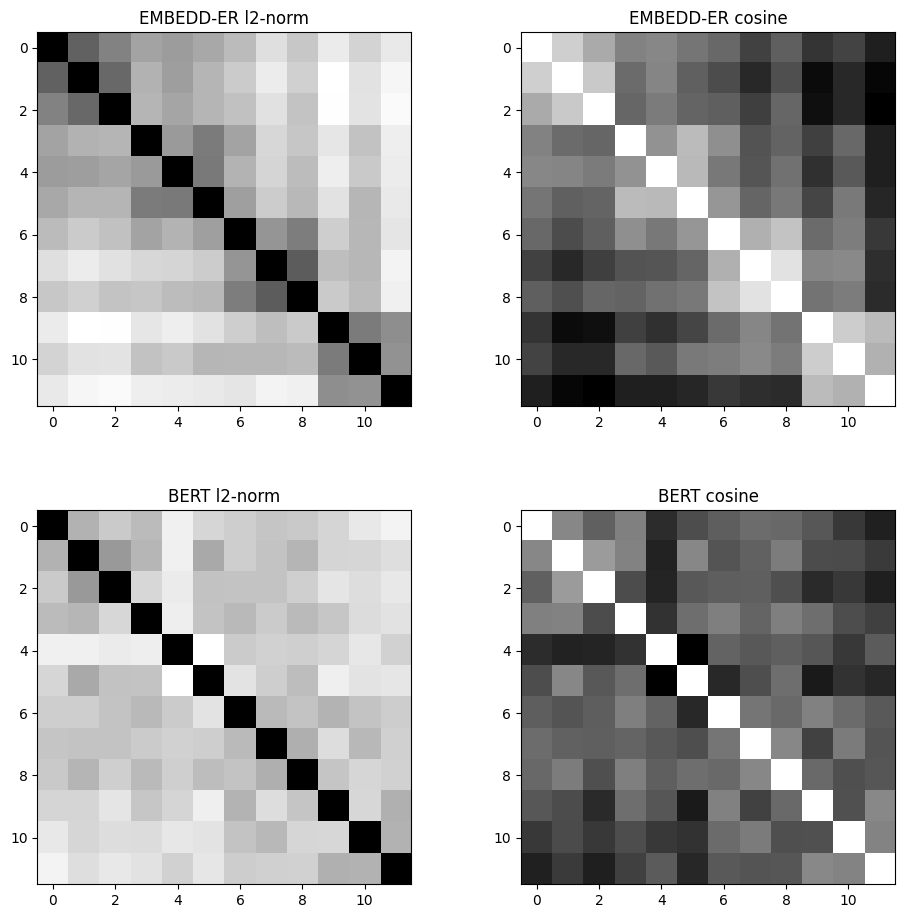

In [14]:
import matplotlib.pyplot as plt

figure_sim, axis_sim = plt.subplots(2, 2)

figure_sim.tight_layout(pad=1.5)
figure_sim.set_figheight(10)
figure_sim.set_figwidth(10)

# For l2-norm EMBEDD-ER
axis_sim[0][0].imshow(similarity_l2norm_embedder, cmap='gray', interpolation = 'nearest')
axis_sim[0][0].set_title("EMBEDD-ER l2-norm")

# For cosine EMBEDD-ER
axis_sim[0][1].imshow(similarity_cosine_embedder, cmap='gray', interpolation = 'nearest')
axis_sim[0][1].set_title("EMBEDD-ER cosine")

# For l2-norm BERT
axis_sim[1][0].imshow(similarity_l2norm_bert, cmap='gray', interpolation = 'nearest')
axis_sim[1][0].set_title("BERT l2-norm")

# For cosine BERT
axis_sim[1][1].imshow(similarity_cosine_bert, cmap='gray', interpolation = 'nearest')
axis_sim[1][1].set_title("BERT cosine")

plt.show()